# ML Hackathon

**By Shubham Kumar**,
 Fractal Imagineer Batch 1

---



# Pre Processing and EDA

In [305]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets start with importing all the datasets

In [306]:
# Load the all dataset
traincsv_df = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/train.csv')
customer_demographics = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/customer_demographics.csv')
campaign_df = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/campaign_data.csv')
coupon_df = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/coupon_item_mapping.csv')
item_df = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/item_data.csv')
transaction_df = pd.read_csv('/content/drive/MyDrive/ML Hackathon Dataset/customer_transaction_data.csv')
test_df = pd.read_csv("/content/drive/MyDrive/ML Hackathon Dataset/test_data.csv")
testcsv_df = test_df.copy()
transaction_data = transaction_df.copy()

**Analysing train.csv dataset**
* train.csv: Train data containing the coupons offered to the given customers under the 18 campaigns

In [307]:
# Displays first 5 rows of the dataframe
traincsv_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [308]:
# Quick summary of dataframe structure and data types
traincsv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [309]:
# count of missing values in each column
traincsv_df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
redemption_status,0


In [310]:
# Unique values in campaign_id
traincsv_df['campaign_id'].nunique()

18

In [311]:
# traincsv_df['campaign_id'].value_counts()

In [312]:
# Unique values in coupon_id
traincsv_df['coupon_id'].nunique()

866

In [313]:
# Unique values in customer_id
traincsv_df['customer_id'].nunique()

1428

In [314]:
# value counts for redemption_status
traincsv_df['redemption_status'].value_counts()

,count
redemption_status,
0,77640
1,729


In [315]:
grouped_redemption = traincsv_df.groupby('redemption_status').agg({'coupon_id': 'nunique', 'customer_id': 'nunique', 'redemption_status': 'count'})
grouped_redemption.columns = ['coupons', 'customers', 'count']
grouped_redemption = grouped_redemption.reset_index()
grouped_redemption

,redemption_status,coupons,customers,count
0,0,866,1428,77640
1,1,239,247,729


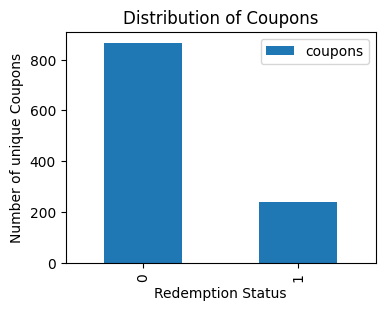

In [316]:
grouped_redemption.plot('redemption_status', 'coupons', kind='bar', figsize=(4,3))
plt.xlabel("Redemption Status")
plt.ylabel("Number of unique Coupons")
plt.title("Distribution of Coupons")
plt.show()

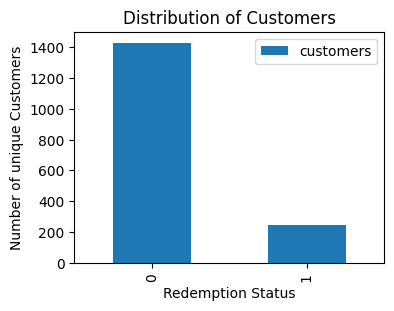

In [317]:
grouped_redemption.plot('redemption_status', 'customers', kind='bar', figsize=(4,3))
plt.xlabel("Redemption Status")
plt.ylabel("Number of unique Customers")
plt.title("Distribution of Customers")
plt.show()

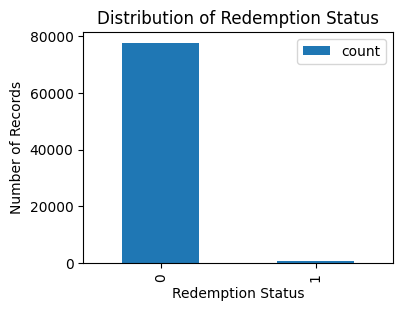

In [318]:
grouped_redemption.plot('redemption_status', 'count', kind='bar', figsize=(4,3))
plt.xlabel("Redemption Status")
plt.ylabel("Number of Records")
plt.title("Distribution of Redemption Status")
plt.show()

Insights after analysing the train.csv :
- The dataset has high class imbalance with only 729 positive redemptions and 77640 as no redemption, i.e even less than 1% (around 0.93%)
- Out of 866 coupons, only 239 have ever been redeemed. Thus there are 627 coupons which have never been redeemed
- Out of 1428 customers only 247 have redeemed the coupon atleast once i.e only 17.29% of total customers

In [319]:
# basic typecasting
traincsv_df['redemption_status'] = traincsv_df['redemption_status'].astype(bool)

In [320]:
traincsv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  bool 
dtypes: bool(1), int64(4)
memory usage: 2.5 MB


So there are no missing values in this dataset. Here are some of the details:

* id -	Unique id for coupon customer impression
* campaign_id	- Unique id for 18 discount campaign
* coupon_id -	Unique id for a discount coupon
* customer_id	- Unique id for a customer
* redemption_status(target) - (0 - Coupon not redeemed, 1 - Coupon redeemed)

Now we will start joining the other tables with this one

**Analysing customer_demographics.csv dataset**

In [321]:
# Print the first 5 rows
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [322]:
# Quick summary of dataframe structure and data types
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [323]:
# count of missing values in each column
customer_demographics.isna().sum()

,0
customer_id,0
age_range,0
marital_status,329
rented,0
family_size,0
no_of_children,538
income_bracket,0


In [324]:
# Value count for each of the columns
for col in customer_demographics.columns:
    print(f"\nValue counts for column: {col}")
    print(customer_demographics[col].value_counts(dropna=False))


Value counts for column: customer_id
customer_id
1581    1
1       1
6       1
7       1
8       1
       ..
22      1
19      1
17      1
15      1
14      1
Name: count, Length: 760, dtype: int64

Value counts for column: age_range
age_range
46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: count, dtype: int64

Value counts for column: marital_status
marital_status
NaN        329
Married    317
Single     114
Name: count, dtype: int64

Value counts for column: rented
rented
0    719
1     41
Name: count, dtype: int64

Value counts for column: family_size
family_size
2     303
1     248
3     104
5+     57
4      48
Name: count, dtype: int64

Value counts for column: no_of_children
no_of_children
NaN    538
1      107
3+      60
2       55
Name: count, dtype: int64

Value counts for column: income_bracket
income_bracket
5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: count,

Lets first Analyse the given data, draw some insights and then handle the missing values accordingly

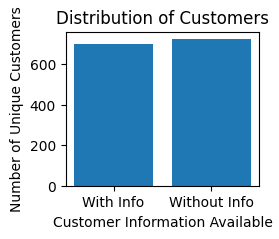

In [325]:
# Customers with demographic info
customers_with_info = set(customer_demographics['customer_id'])

# Mark redemptions for customers with and without info
with_info = traincsv_df[traincsv_df['customer_id'].isin(customers_with_info)]
without_info = traincsv_df[~traincsv_df['customer_id'].isin(customers_with_info)]

# Plot 1: Number of unique customers
info_customer_counts = [
    with_info['customer_id'].nunique(),
    without_info['customer_id'].nunique()
]

plt.figure(figsize=(2.5,2))
plt.bar(['With Info', 'Without Info'], info_customer_counts)
plt.xlabel('Customer Information Available')
plt.ylabel('Number of Unique Customers')
plt.title('Distribution of Customers')
plt.show()

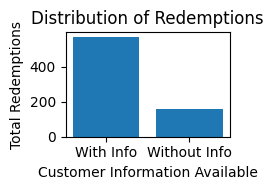

In [326]:
# Total redemptions Plot
info_redemption_counts = [
    with_info['redemption_status'].sum(),
    without_info['redemption_status'].sum()
]

plt.figure(figsize=(2.5,2))
plt.bar(['With Info', 'Without Info'], info_redemption_counts)
plt.xlabel('Customer Information Available')
plt.ylabel('Total Redemptions')
plt.title('Distribution of Redemptions')
plt.tight_layout()
plt.show()

Insights from customer_demographics:
- Customers whose demographics are available redeem more coupons as compared to those whose info are not available
- Almost half of the total customers demographics are not available

Basic Data cleaning

In [327]:
# For column family_size
# Handling string data types and typecasting to int
customer_demographics['family_size'] = customer_demographics['family_size'].str.replace('+', '', regex=False).astype('int64')
customer_demographics.value_counts('family_size')

,count
family_size,
2,303
1,248
3,104
5,57
4,48


In [328]:
# Handling the no_of_children column

# Clean data and handling the strings values
customer_demographics['no_of_children'] = customer_demographics['no_of_children'].str.replace('+', '', regex=False)
customer_demographics['no_of_children'] = pd.to_numeric(customer_demographics['no_of_children'], errors='coerce')

In [329]:
customer_demographics['no_of_children'].value_counts(dropna=False)

,count
no_of_children,
NaN,538
1.0,107
3.0,60
2.0,55


In [330]:
# Handling the no_of_children column
# Null no_of_children column grouped by family_size and marital_status
customer_demographics[customer_demographics['no_of_children'].isnull()] \
            .groupby(['family_size', 'marital_status'], dropna=False) \
            .size() \
            .reset_index(name='count_null_no_of_children')

,family_size,marital_status,count_null_no_of_children
0,1,Single,65
1,1,NaN,183
2,2,Married,175
3,2,Single,26
4,2,NaN,89


**Insights from this table:**

1. family_size is 1 and no_of_children is Null while marital_status is Single, then no_of_children can be imputed with 0
2. family_size is 1 and no_of_children is Null also marital_status is Null, then no_of_children can be imputed with 0 and marital_status with Single
3. family_size is 2 and no_of_children is Null while marital_status is Married, then no_of_children can be imputed with 0

These conclusions have been validated by the data as well as shown below

In [331]:
# No. of rows where family_size is 1, marital_status is Null and No. of children is not Null
filtered_cust = customer_demographics[
    (customer_demographics['family_size'] == 1) &
    (customer_demographics['marital_status'].isna()) &
    (customer_demographics['no_of_children'].notna())
]

filtered_cust.head()  # 0 such Rows

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket


In [332]:
# No. of rows where family_size is 2, marital_status is Married and No. of children is not Null
filtered_cust1 = customer_demographics[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['marital_status'] == 'Married') &
    (customer_demographics['no_of_children'].notna())
]

filtered_cust1.head()  # 0 such Rows

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket


In [333]:
# No. of rows where family_size is 1, marital_status is Single and No. of children is not Null
filtered_cust2 = customer_demographics[
    (customer_demographics['family_size'] == 1) &
    (customer_demographics['marital_status'] == 'Single') &
    (customer_demographics['no_of_children'].notna())
]

filtered_cust2.head()  # 0 such Rows

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket


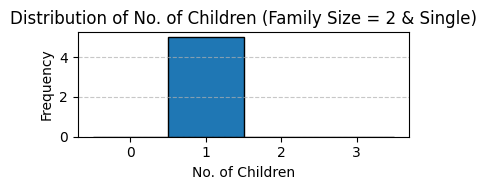

In [334]:
# Distribution for family_size is 2 and marital_status is Single
# while no_of_children is Not Null
filtered_cust3 = customer_demographics[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['marital_status'] == 'Single') &
    (customer_demographics['no_of_children'].notna())
]

# Plot
plt.figure(figsize=(4, 2))
plt.hist(filtered_cust3['no_of_children'], bins=[0, 1, 2, 3, 4], edgecolor='black', align='left')
plt.title("Distribution of No. of Children (Family Size = 2 & Single)")
plt.xlabel("No. of Children")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2, 3])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights**
- As evident from the plot, all the data points where `family_size` is 2 and `marital_status` is Single, then `no_of_children` is 1. So we will impute all the Null values in `no_of_children` in such case with 1.

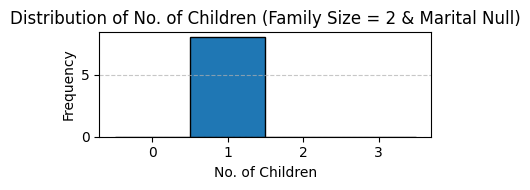

In [335]:
# Distribution for family_size is 2 and marital_status is Null
# while no_of_children is Not Null
filtered_cust4 = customer_demographics[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['marital_status'].isna()) &
    (customer_demographics['no_of_children'].notna())
]

# Plot
plt.figure(figsize=(4, 2))
plt.hist(filtered_cust4['no_of_children'], bins=[0, 1, 2, 3, 4], edgecolor='black', align='left')
plt.title("Distribution of No. of Children (Family Size = 2 & Marital Null)")
plt.xlabel("No. of Children")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2, 3])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights**
- As evident from the plot, all the data points where `family_size` is 2 and `marital_status` is Null, then `no_of_children` is 1. So we will impute all the Null values in `no_of_children` in such case with 1.

In [336]:
# Rule based imputations for all the missing values of no_of_children

# Rule 1
customer_demographics.loc[
    (customer_demographics['family_size'] == 1) &
    (customer_demographics['no_of_children'].isna()) &
    (customer_demographics['marital_status'] == 'Single'),
    'no_of_children'
] = 0

# Rule 2
customer_demographics.loc[
    (customer_demographics['family_size'] == 1) &
    (customer_demographics['no_of_children'].isna()) &
    (customer_demographics['marital_status'].isna()),
    ['no_of_children', 'marital_status']
] = [0, 'Single']

# Rule 3
customer_demographics.loc[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['no_of_children'].isna()) &
    (customer_demographics['marital_status'] == 'Married'),
    'no_of_children'
] = 0

# Rule 4
customer_demographics.loc[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['marital_status'] == 'Single') &
    (customer_demographics['no_of_children'].isna()),
    'no_of_children'
] = 1

# Rule 5
customer_demographics.loc[
    (customer_demographics['family_size'] == 2) &
    (customer_demographics['marital_status'].isna()) &
    (customer_demographics['no_of_children'].isna()),
    'no_of_children'
] = 1

customer_demographics['no_of_children'] = customer_demographics['no_of_children'].astype('int64')

In [337]:
customer_demographics['no_of_children'].value_counts(dropna=False)

,count
no_of_children,
0,423
1,222
3,60
2,55


So we have successfully handled the missing values in `no_of_children` Column

In [338]:
# Handling marital_status Column
customer_demographics['marital_status'].value_counts(dropna=False)

,count
marital_status,
Married,317
Single,297
NaN,146


In [339]:
# Null no_of_children column grouped by family_size and marital_status
customer_demographics[customer_demographics['marital_status'].isnull()] \
            .groupby(['family_size', 'no_of_children'], dropna=False) \
            .size() \
            .reset_index(name='count_null_marital_status')

,family_size,no_of_children,count_null_marital_status
0,2,1,97
1,3,1,26
2,3,2,4
3,4,2,12
4,4,3,1
5,5,3,6


**Insights from this table:**

1. `family_size` is 2 and `no_of_children` is 1 while `marital_status` is Null, then `marital_status` can be imputed with Single
2. `family_size` is 3 and `no_of_children` is 2 while `marital_status` is Null, then `marital_status` can be imputed with Single
3. `family_size` is 4 and `no_of_children` is 3 while `marital_status` is Null, then `marital_status` can be imputed with Single

In [340]:
# Value counts of marital_status where family_size is 3 and no_of_children is 1
filtered_cust5 = customer_demographics[
    (customer_demographics['family_size'] == 3) &
    (customer_demographics['marital_status'].notna()) &
    (customer_demographics['no_of_children'] == 1)
]

filtered_cust5['marital_status'].value_counts()

,count
marital_status,
Married,63
Single,5


We can impute the datapoints where `marital_status` is `Null` AND `family_size` is 3 and `no_of_children` is 1 with `marital_status` as Married as this is the mode when we analyse this distribution

In [341]:
# Value counts of marital_status where family_size is 4 and no_of_children is 2
filtered_cust6 = customer_demographics[
    (customer_demographics['family_size'] == 4) &
    (customer_demographics['marital_status'].notna()) &
    (customer_demographics['no_of_children'] == 2)
]

filtered_cust6['marital_status'].value_counts()

,count
marital_status,
Married,31
Single,2


We can impute the datapoints where `marital_status` is `Null` AND `family_size` is 4 and `no_of_children` is 2 with `marital_status` as Married as this is the mode when we analyse this distribution

In [342]:
# Value counts of marital_status where family_size is 5 and no_of_children is 3
filtered_cust7 = customer_demographics[
    (customer_demographics['family_size'] == 5) &
    (customer_demographics['marital_status'].notna()) &
    (customer_demographics['no_of_children'] == 3)
]

filtered_cust7['marital_status'].value_counts()

,count
marital_status,
Married,48
Single,3


We can impute the datapoints where `marital_status` is `Null` AND `family_size` is 5 and `no_of_children` is 3 with `marital_status` as Married as this is the mode when we analyse this distribution

In [343]:
# Rule based imputation for marital_status

cd = customer_demographics  # alias

# 1. family_size = 2, no_of_children = 1, marital_status is null → Single
cd.loc[(cd['family_size'] == 2) &
      (cd['no_of_children'] == 1) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Single'

# 2. family_size = 3, no_of_children = 1, marital_status is null → Married
cd.loc[(cd['family_size'] == 3) &
      (cd['no_of_children'] == 1) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Married'

# 3. family_size = 3, no_of_children = 2, marital_status is null → Single
cd.loc[(cd['family_size'] == 3) &
      (cd['no_of_children'] == 2) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Single'

# 4. family_size = 4, no_of_children = 2, marital_status is null → Married
cd.loc[(cd['family_size'] == 4) &
      (cd['no_of_children'] == 2) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Married'

# 5. family_size = 4, no_of_children = 3, marital_status is null → Single
cd.loc[(cd['family_size'] == 4) &
      (cd['no_of_children'] == 3) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Single'

# 6. family_size = 5, no_of_children = 3, marital_status is null → Married
cd.loc[(cd['family_size'] == 5) &
      (cd['no_of_children'] == 3) &
      (cd['marital_status'].isna()), 'marital_status'] = 'Married'

In [344]:
# Distribution of married and single in marital_status
customer_demographics['marital_status'].value_counts(dropna=False)

,count
marital_status,
Single,399
Married,361


* With this, we also imputed the missing values from the marital_status column.

* Let's check if there is any missing values in customer_demographics dataframe

In [345]:
# Null values count
customer_demographics.isna().sum()

,0
customer_id,0
age_range,0
marital_status,0
rented,0
family_size,0
no_of_children,0
income_bracket,0


Now there are no any missing values in `customer_demographics` table. Let's create a categorical column for `age_range`

In [346]:
customer_demographics['age_range'].value_counts()

,count
age_range,
46-55,271
36-45,187
26-35,130
70+,68
56-70,59
18-25,45


Creating a New column named `age_range_cat` in `customer_demographics` so that a categorical insight can be fed into our Model as the string datatype based `age_range` doesn't implies anything significant

In [347]:
# Define an ordered list for age ranges
age_order = ['18-25', '26-35', '36-45', '46-55', '56-70', '70+']

# Convert to ordered categorical and then to numeric codes
customer_demographics['age_range_cat'] = pd.Categorical(
    customer_demographics['age_range'],
    categories=age_order,
    ordered=True
).codes

In [348]:
customer_demographics['age_range_cat'].value_counts()

,count
age_range_cat,
3,271
2,187
1,130
5,68
4,59
0,45


In [349]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int64 
 5   no_of_children  760 non-null    int64 
 6   income_bracket  760 non-null    int64 
 7   age_range_cat   760 non-null    int8  
dtypes: int64(5), int8(1), object(2)
memory usage: 42.4+ KB


Typecasting to be done:

* `marital_status` is either married or single : can be converted to `category`, but we are not doing it right now, will check in the last if it has any missing values
* `rented` is either 0 or 1 : can be converted to `bool`, but we are not doing it right now, same treatment as above
* `family_size` is small positive integers — can be downcast to save memory
* `no_of_children` same reason as `family_size`

In [350]:
# Convert family_size to int8 (saves memory, since values are small)
customer_demographics['family_size'] = customer_demographics['family_size'].astype('int8')

# Convert no_of_children to int8
customer_demographics['no_of_children'] = customer_demographics['no_of_children'].astype('int8')

In [351]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int8  
 5   no_of_children  760 non-null    int8  
 6   income_bracket  760 non-null    int64 
 7   age_range_cat   760 non-null    int8  
dtypes: int64(3), int8(3), object(2)
memory usage: 32.0+ KB


In [352]:
# Merging traincsv_df with customer_demographics and saving in df
df = traincsv_df.merge(customer_demographics, on='customer_id', how='left')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_range_cat
0,1,13,27,1053,False,46-55,Single,0.0,1.0,0.0,5.0,3.0
1,2,13,116,48,False,36-45,Married,0.0,2.0,0.0,3.0,2.0
2,6,9,635,205,False,46-55,Married,0.0,2.0,0.0,7.0,3.0
3,7,13,644,1050,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,False,46-55,Married,0.0,2.0,0.0,3.0,3.0


In [353]:
df.shape

(78369, 12)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 78369 non-null  int64  
 1   campaign_id        78369 non-null  int64  
 2   coupon_id          78369 non-null  int64  
 3   customer_id        78369 non-null  int64  
 4   redemption_status  78369 non-null  bool   
 5   age_range          43661 non-null  object 
 6   marital_status     43661 non-null  object 
 7   rented             43661 non-null  float64
 8   family_size        43661 non-null  float64
 9   no_of_children     43661 non-null  float64
 10  income_bracket     43661 non-null  float64
 11  age_range_cat      43661 non-null  float64
dtypes: bool(1), float64(5), int64(4), object(2)
memory usage: 6.7+ MB


In [355]:
df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
redemption_status,0
age_range,34708
marital_status,34708
rented,34708
family_size,34708
no_of_children,34708


In [356]:
# Customer_id which are in train.csv but not in customer_demographics.csv
missing_customers = traincsv_df[~traincsv_df['customer_id'].isin(customer_demographics['customer_id'])]
print(missing_customers.shape[0])

34708


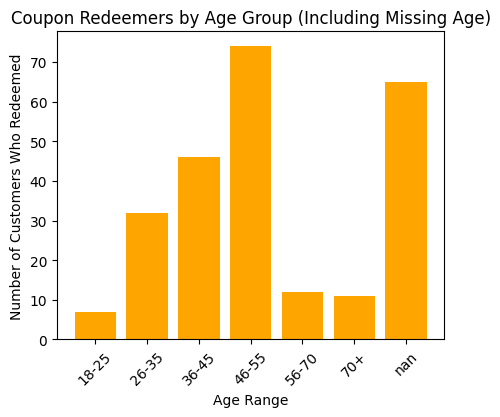

In [357]:
import matplotlib.pyplot as plt

# Filter to only redeemed customers
redeemed_df = df[df['redemption_status'] == 1]

# Group by age_range (including NaN) and count unique customers
redeemers_by_age = redeemed_df.groupby('age_range', dropna=False)['customer_id'].nunique()

# Plot
plt.figure(figsize=(5,4))
plt.bar(redeemers_by_age.index.astype(str), redeemers_by_age.values, color='orange')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers Who Redeemed')
plt.title('Coupon Redeemers by Age Group (Including Missing Age)')
plt.xticks(rotation=45)
plt.show()

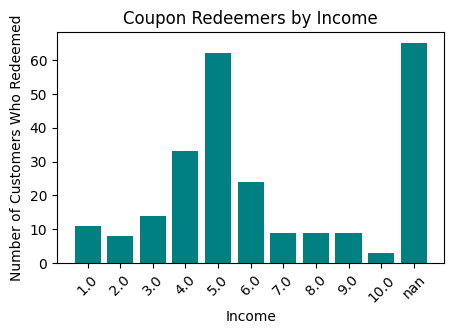

In [358]:
# Group by income bracket (including NaN) and count unique customers
redeemers_by_income = redeemed_df.groupby('income_bracket', dropna=False)['customer_id'].nunique()

# Plot
plt.figure(figsize=(5,3))
plt.bar(redeemers_by_income.index.astype(str), redeemers_by_income.values, color='teal')
plt.xlabel('Income')
plt.ylabel('Number of Customers Who Redeemed')
plt.title('Coupon Redeemers by Income')
plt.xticks(rotation=45)
plt.show()

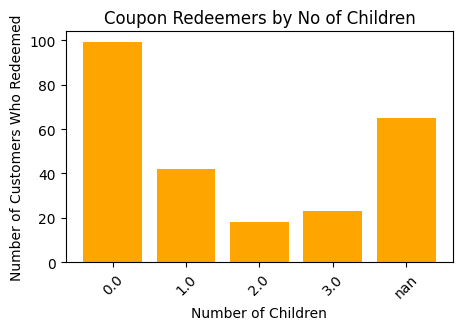

In [359]:
# Group by No of children (including NaN) and count unique customers
redeemers_by_children = redeemed_df.groupby('no_of_children', dropna=False)['customer_id'].nunique()

# Plot
plt.figure(figsize=(5,3))
plt.bar(redeemers_by_children.index.astype(str), redeemers_by_children.values, color='orange')
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers Who Redeemed')
plt.title('Coupon Redeemers by No of Children')
plt.xticks(rotation=45)
plt.show()

Insights from Plots:
- After merging `traincsv_df` with `customer_demographics`, we can clearly see that among the customers who redeemed the Coupon(and demographics is available), Most of them are in the age range 46-55.
- Of the customers whose demographics where available, the customers who redeemed the coupons most of the time where in the Mid-Income Range
- Among the customers who redeemed the coupon, Most of them had 0 children

**Analysing campaign_data.csv Dataset**

In [360]:
# Print the first 5 rows
campaign_df.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [361]:
# Quick Summary of dataframe
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [362]:
# Null Value Counts
campaign_df.isna().sum()

,0
campaign_id,0
campaign_type,0
start_date,0
end_date,0


In [363]:
campaign_df['campaign_type'].value_counts()

,count
campaign_type,
Y,22
X,6


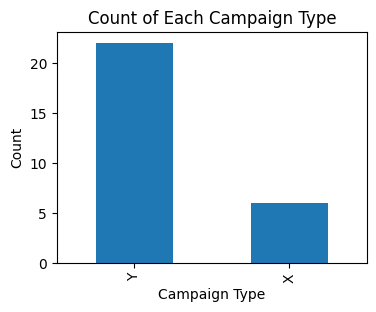

In [364]:
# Count of Campaign_type
import matplotlib.pyplot as plt

campaign_df['campaign_type'].value_counts().plot(kind='bar', figsize=(4,3))

plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.title('Count of Each Campaign Type')
plt.show()

In [365]:
# Basic Typecasting

# Typecast campaign_type to category
campaign_df['campaign_type'] = campaign_df['campaign_type'].astype('category')

# Convert start_date and end_date to datetime
campaign_df['start_date'] = pd.to_datetime(campaign_df['start_date'])
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'])

<ipython-input-365-3803bbb4cc33>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  campaign_df['start_date'] = pd.to_datetime(campaign_df['start_date'])
<ipython-input-365-3803bbb4cc33>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'])


In [366]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    28 non-null     int64         
 1   campaign_type  28 non-null     category      
 2   start_date     28 non-null     datetime64[ns]
 3   end_date       28 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(1)
memory usage: 956.0 bytes


In [367]:
campaign_df.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22
2,20,Y,2013-07-09,2013-11-16
3,23,Y,2013-08-10,2013-11-15
4,21,Y,2013-09-16,2013-10-18


Columns of `campaign_df`:

* campaign_id	- Unique id for a discount campaign
* campaign_type	- Anonymised Campaign Type (X/Y)
* start_date - Campaign Start Date
* end_date - Campaign End Date

campaign_df has no missing values so lets move on to join it with our `df` dataframe

In [368]:
# df left join campaign_df using campaign_id
df = df.merge(campaign_df, on='campaign_id', how='left')

In [369]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_range_cat,campaign_type,start_date,end_date
0,1,13,27,1053,False,46-55,Single,0.0,1.0,0.0,5.0,3.0,X,2013-05-19,2013-05-07
1,2,13,116,48,False,36-45,Married,0.0,2.0,0.0,3.0,2.0,X,2013-05-19,2013-05-07
2,6,9,635,205,False,46-55,Married,0.0,2.0,0.0,7.0,3.0,Y,2013-11-03,2013-12-04
3,7,13,644,1050,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,2013-05-19,2013-05-07
4,9,8,1017,1489,False,46-55,Married,0.0,2.0,0.0,3.0,3.0,X,2013-02-16,2013-05-04


In [370]:
# quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  bool          
 5   age_range          43661 non-null  object        
 6   marital_status     43661 non-null  object        
 7   rented             43661 non-null  float64       
 8   family_size        43661 non-null  float64       
 9   no_of_children     43661 non-null  float64       
 10  income_bracket     43661 non-null  float64       
 11  age_range_cat      43661 non-null  float64       
 12  campaign_type      78369 non-null  category      
 13  start_date         78369 non-null  datetime64[ns]
 14  end_da

So, we can see that no null values have been generated in the columns merged from `campaign_df`, we can safely move ahead

**Analysing coupon_item_mapping.csv Dataset**

In [371]:
# Print the first 5 rows
coupon_df.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [372]:
# quick summary
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [373]:
coupon_df['coupon_id'].nunique()

1116

In [374]:
coupon_df['item_id'].nunique()

36289

Details of `coupon_df` dataframe:

* `coupon_id` :	Unique id for a discount coupon (no order)
* `item_id`	: Unique id for items for which the given coupon is valid (no order)

No typecasting is required as of now so we will move with joining the `coupon_df` dataframe to the item dataframe

**Analysing item_data.csv Dataset**

In [375]:
# Print the first 5 rows
item_df.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [376]:
# Quick summary
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [377]:
item_df['brand'].nunique()

5528

In [378]:
item_df['brand_type'].value_counts()

,count
brand_type,
Established,62842
Local,11224


In [379]:
item_df['category'].nunique()

19

Details of `item_df` dataframe:

* `item_id` :	Unique id for item
* `brand` :	Unique id for item brand
* `brand_type` :	Brand Type (local/Established)
* `category`	: Item Category(19 Unique categories)

We'll see more in the feature engineering part later on

Feature Engineering for coupon_df & item_df before merging

In [380]:
# Perform left join on item_id
coupon_item_merged = pd.merge(coupon_df, item_df, on="item_id", how="left")

# Display the first few rows to inspect the merge
coupon_item_merged.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [381]:
# Aggregate features per coupon_id
item_aggregated = coupon_item_merged.groupby("coupon_id").agg(
    num_items=("item_id", "nunique"),
    num_brands=("brand", "nunique"),
    num_categories=("category", "nunique"),
    most_common_brand_type=("brand_type", lambda x: x.mode()[0] if not x.mode().empty else None),
    most_common_category=("category", lambda x: x.mode()[0] if not x.mode().empty else None),
    has_established_brand=("brand_type", lambda x: int("Established" in x.values)),
    has_local_brand=("brand_type", lambda x: int("Local" in x.values))
).reset_index()

item_aggregated.head()

,coupon_id,num_items,num_brands,num_categories,most_common_brand_type,most_common_category,has_established_brand,has_local_brand
0,1,39,3,2,Established,Natural Products,1,0
1,2,2,1,1,Established,Grocery,1,0
2,3,17,2,1,Established,Grocery,1,0
3,4,24,1,1,Established,Grocery,1,0
4,5,7,1,1,Established,Pharmaceutical,1,0


In [382]:
both_brand_types = item_aggregated[
    (item_aggregated['has_established_brand'] == 1) &
    (item_aggregated['has_local_brand'] == 1)
]

print(both_brand_types.shape)
both_brand_types.head()

(25, 8)


,coupon_id,num_items,num_brands,num_categories,most_common_brand_type,most_common_category,has_established_brand,has_local_brand
5,6,3713,170,5,Established,Grocery,1,1
6,7,2942,371,14,Established,Natural Products,1,1
7,8,3718,955,6,Established,Meat,1,1
8,9,1535,59,5,Established,Grocery,1,1
19,20,3372,383,15,Established,Natural Products,1,1


In [383]:
item_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   coupon_id               1116 non-null   int64 
 1   num_items               1116 non-null   int64 
 2   num_brands              1116 non-null   int64 
 3   num_categories          1116 non-null   int64 
 4   most_common_brand_type  1116 non-null   object
 5   most_common_category    1116 non-null   object
 6   has_established_brand   1116 non-null   int64 
 7   has_local_brand         1116 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 69.9+ KB


* Addition of `num_brands` which is the no. of brands, grouped by `coupon_id`
* `num_items` which is the no. of items grouped by `coupon_id`
* `num_categories` is the no. of categories in that `coupon_id`
* `most_common_brand_type` is the most common brand type(Local/Established) across that `coupon_id`
* `most_common_category` is the most common category in that `coupon_id`
* `has_established_brand` is a boolean flag for Established Brand type
* `has_local_brand `  is a boolean flag for Established Brand type

Merging `item_aggregated` with `df`

In [384]:
# Left join df with coupon_df on 'coupon_id'
df = df.merge(item_aggregated, on='coupon_id', how='left')

In [385]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,campaign_type,start_date,end_date,num_items,num_brands,num_categories,most_common_brand_type,most_common_category,has_established_brand,has_local_brand
0,1,13,27,1053,False,46-55,Single,0.0,1.0,0.0,...,X,2013-05-19,2013-05-07,125,2,1,Established,Grocery,1,0
1,2,13,116,48,False,36-45,Married,0.0,2.0,0.0,...,X,2013-05-19,2013-05-07,3,1,1,Local,Grocery,0,1
2,6,9,635,205,False,46-55,Married,0.0,2.0,0.0,...,Y,2013-11-03,2013-12-04,67,1,1,Established,Pharmaceutical,1,0
3,7,13,644,1050,False,NaN,NaN,NaN,NaN,NaN,...,X,2013-05-19,2013-05-07,4,1,1,Established,Grocery,1,0
4,9,8,1017,1489,False,46-55,Married,0.0,2.0,0.0,...,X,2013-02-16,2013-05-04,32,1,1,Established,Grocery,1,0


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      78369 non-null  int64         
 1   campaign_id             78369 non-null  int64         
 2   coupon_id               78369 non-null  int64         
 3   customer_id             78369 non-null  int64         
 4   redemption_status       78369 non-null  bool          
 5   age_range               43661 non-null  object        
 6   marital_status          43661 non-null  object        
 7   rented                  43661 non-null  float64       
 8   family_size             43661 non-null  float64       
 9   no_of_children          43661 non-null  float64       
 10  income_bracket          43661 non-null  float64       
 11  age_range_cat           43661 non-null  float64       
 12  campaign_type           78369 non-null  catego

In [387]:
# Null value count after merging coupon_df with df dataframe
df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
redemption_status,0
age_range,34708
marital_status,34708
rented,34708
family_size,34708
no_of_children,34708


**Analysing customer_transaction_data.csv Dataset**

In [388]:
# Print the first 5 rows
transaction_df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [389]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [390]:
transaction_df.describe()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00
max,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,0.000000e+00,0.000000e+00


In [391]:
# Renaming the date column to avoid confusion
transaction_df.rename(columns={'date': 'transaction_date'}, inplace=True)

# Convert to datetime
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])

In [392]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   transaction_date  1324566 non-null  datetime64[ns]
 1   customer_id       1324566 non-null  int64         
 2   item_id           1324566 non-null  int64         
 3   quantity          1324566 non-null  int64         
 4   selling_price     1324566 non-null  float64       
 5   other_discount    1324566 non-null  float64       
 6   coupon_discount   1324566 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 70.7 MB


In [393]:
# converting other_discount & coupon_discount to positive values
# so they’re easier to interpret during analysis and modeling

transaction_df['other_discount'] = transaction_df['other_discount'].abs()
transaction_df['coupon_discount'] = transaction_df['coupon_discount'].abs()

transaction_df.head()

,transaction_date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,10.69,0.0
1,2012-01-02,1501,54253,1,53.43,13.89,0.0
2,2012-01-02,1501,31962,1,106.50,14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,28.14,0.0


Details of `transaction_df` dataframe:

* `transaction_date` :	Date of Transaction
* `customer_id`	: Unique id for a customer
* `item_id` :	Unique id for item
* `quantity` : quantity of items bought
* `selling_price` :	Sales value of the transaction
* `other_discount` :	Discount from other sources such as manufacturer coupon/loyalty card
* `coupon_discount`	: Discount availed from retailer coupon

Since, this `transaction_df` has no missing values we will directly proceed with merging the `transaction_df` with `df`

In [394]:
df.shape

(78369, 22)

In [395]:
df['customer_id'].nunique()

1428

In [396]:
customer_demographics['customer_id'].nunique()

760

In [397]:
transaction_df['customer_id'].nunique()

1582

In [398]:
missing_customers = set(df['customer_id']) - set(transaction_df['customer_id'])
print(f"Number of customer_id in df but not in transaction_df: {len(missing_customers)}")

Number of customer_id in df but not in transaction_df: 0


There isn't any customer who is in the train.csv data but not in transactions data.

Now lets perform some data analysis

In [399]:
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
transaction_data['month'] = transaction_data.date.dt.month + transaction_data.date.dt.year.replace({2012: 0, 2013: 12})
transaction_data['coupon_discount'] = transaction_data['coupon_discount'] < 0
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,month
0,2012-01-02,1501,26830,1,35.26,-10.69,False,1
1,2012-01-02,1501,54253,1,53.43,-13.89,False,1
2,2012-01-02,1501,31962,1,106.50,-14.25,False,1
3,2012-01-02,1501,33647,1,67.32,0.00,False,1
4,2012-01-02,1501,48199,1,71.24,-28.14,False,1


In [400]:
# Calculating aggregates of column across transaction_data grouped by month
group_by_date = transaction_data.groupby('month').agg({'customer_id': 'nunique', 'item_id': 'nunique', 'quantity': 'count', 'coupon_discount': 'sum'})
group_by_date.columns = ['customers', 'items', 'count', 'coupon_discount']
group_by_date = group_by_date.reset_index()
group_by_date.head()

,month,customers,items,count,coupon_discount
0,1,351,7432,12382,187
1,2,654,11482,25073,287
2,3,1050,16307,46730,476
3,4,1463,19801,68340,868
4,5,1444,20334,79093,923


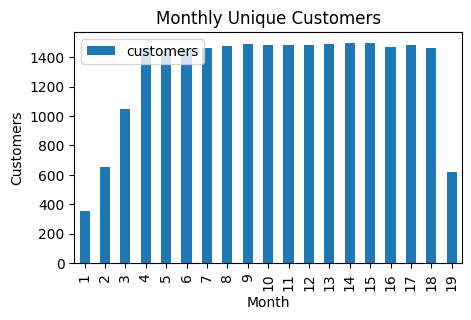

In [401]:
# Count of unique customers by Month
group_by_date.plot('month', 'customers', kind='bar', figsize = (5,3))
plt.xlabel('Month')
plt.ylabel('Customers')
plt.title('Monthly Unique Customers')
plt.show()

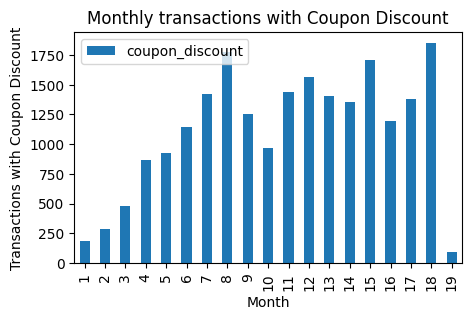

In [402]:
# Count of transactions using coupon discount over the months
group_by_date.plot('month', 'coupon_discount', kind='bar', figsize = (5,3))
plt.xlabel('Month')
plt.ylabel('Transactions with Coupon Discount')
plt.title('Monthly transactions with Coupon Discount')
plt.show()

Insights:
- Transactions have spiked up in specific months denoting sale or any scheme introduction
- Unique customers have been consistent across the months except for the start and end, this maybe due to growing phase of the company in initial months. We should ignore Month 19 as it contains only 3 days transaction

# Feature Engineering

Apart from the features that we have created in the Analysis by section, here are some additional Features

In [403]:
# Creating time based features for future use
transaction_df['day_of_week'] = transaction_df['transaction_date'].dt.dayofweek
transaction_df['month'] = transaction_df['transaction_date'].dt.month
transaction_df['quarter'] = transaction_df['transaction_date'].dt.quarter
transaction_df['year'] = transaction_df['transaction_date'].dt.year

In [404]:
# Final and total discount
transaction_df['total_discount'] = (transaction_df['other_discount'] + transaction_df['coupon_discount'])
transaction_df['final_price'] = transaction_df['selling_price'] - transaction_df['other_discount'] - transaction_df['coupon_discount']
transaction_df['spent'] = transaction_df['final_price'] * transaction_df['quantity']

In [405]:
transaction_df.describe()

,transaction_date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,day_of_week,month,quarter,year,total_discount,final_price,spent
count,1324566,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,2012-11-02 13:34:00.865913856,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,1.776871e+01,5.948983e-01,3.067426e+00,6.040570e+00,2.335552e+00,2.012379e+03,1.836360e+01,9.624003e+01,1.447412e+05
min,2012-01-02 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.012000e+03,0.000000e+00,-1.424440e+03,-2.270568e+04
25%,2012-07-08 00:00:00,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.012000e+03,0.000000e+00,3.526000e+01,3.562000e+01
50%,2012-11-05 00:00:00,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,1.780000e+00,0.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,2.012000e+03,3.210000e+00,6.376000e+01,7.088000e+01
75%,2013-03-02 00:00:00,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,2.315000e+01,0.000000e+00,5.000000e+00,9.000000e+00,3.000000e+00,2.013000e+03,2.458000e+01,1.065000e+02,1.314300e+02
max,2013-07-03 00:00:00,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,3.120310e+03,1.992230e+03,6.000000e+00,1.200000e+01,4.000000e+00,2.013000e+03,3.258160e+03,1.602864e+04,7.552817e+08
std,NaN,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00,1.916515e+00,3.249643e+00,1.059984e+00,4.851557e-01,3.929699e+01,1.479755e+02,2.008787e+06


We tried merging on `customer_id` and `item_id`, but it generated a lot of missing values as:
* Most coupons in df were never actually used in transactions
* Those (`customer_id`, `item_id`) pairs don’t exist in transaction_df, so their aggregated data is missing
* This is maybe happening because many customers get coupons for items they never buy, so now we aggregate data grouped by `customer_id` only, and will also join on `customer_id`

In [406]:
# Aggregation
agg_transactions = transaction_df.groupby(['customer_id']).agg(
    total_quantity=('quantity', 'sum'),
    avg_selling_price=('selling_price', 'mean'),
    total_spent=('spent', 'sum'),
    avg_spent=('spent', 'mean'),
    total_discount=('total_discount', 'sum'),
    avg_discount=('total_discount', 'mean'),
    first_transaction_date=('transaction_date', 'min'),
    last_transaction_date=('transaction_date', 'max'),
    num_unique_transaction_days=('transaction_date', 'nunique'),
    common_dow=('day_of_week', lambda x: x.mode()[0] if not x.mode().empty else None),
    common_month=('month', lambda x: x.mode()[0] if not x.mode().empty else None),
    common_quarter=('quarter', lambda x: x.mode()[0] if not x.mode().empty else None),
    common_year=('year', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

# Add recency (days since last transaction)
latest_date = transaction_df['transaction_date'].max()
agg_transactions['recency'] = (latest_date - agg_transactions['last_transaction_date']).dt.days

In [407]:
agg_transactions.head()

,customer_id,total_quantity,avg_selling_price,total_spent,avg_spent,total_discount,avg_discount,first_transaction_date,last_transaction_date,num_unique_transaction_days,common_dow,common_month,common_quarter,common_year,recency
0,1,1227,94.001842,9.281611e+04,88.564990,19147.23,18.270258,2012-02-21,2013-06-30,56,3,5,2,2012,3
1,2,474,102.864033,4.134048e+04,98.664630,7301.29,17.425513,2012-04-13,2013-06-26,37,5,6,2,2012,7
2,3,8163,103.617404,4.892148e+06,6939.217461,18193.07,25.805773,2012-04-23,2013-06-16,41,4,7,3,2012,17
3,4,280,154.423727,4.316540e+04,196.206364,3016.24,13.710182,2012-04-14,2013-05-11,26,5,5,3,2012,53
4,5,93353,130.827146,1.042332e+08,131607.592702,10907.90,13.772601,2012-04-28,2013-06-29,163,1,5,2,2012,4


In [408]:
agg_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  1582 non-null   int64         
 1   total_quantity               1582 non-null   int64         
 2   avg_selling_price            1582 non-null   float64       
 3   total_spent                  1582 non-null   float64       
 4   avg_spent                    1582 non-null   float64       
 5   total_discount               1582 non-null   float64       
 6   avg_discount                 1582 non-null   float64       
 7   first_transaction_date       1582 non-null   datetime64[ns]
 8   last_transaction_date        1582 non-null   datetime64[ns]
 9   num_unique_transaction_days  1582 non-null   int64         
 10  common_dow                   1582 non-null   int32         
 11  common_month                 1582 non-null 

In [409]:
# Merging Transactions aggregation data with df dataframe
df = df.merge(agg_transactions, on='customer_id', how='left')

df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,total_discount,avg_discount,first_transaction_date,last_transaction_date,num_unique_transaction_days,common_dow,common_month,common_quarter,common_year,recency
0,1,13,27,1053,False,46-55,Single,0.0,1.0,0.0,...,10371.42,33.456194,2012-01-10,2013-07-01,80,2,5,2,2013,2
1,2,13,116,48,False,36-45,Married,0.0,2.0,0.0,...,11901.97,30.914208,2012-03-04,2013-06-13,64,5,6,2,2012,20
2,6,9,635,205,False,46-55,Married,0.0,2.0,0.0,...,19407.51,20.007742,2012-03-01,2013-06-29,83,2,3,2,2012,4
3,7,13,644,1050,False,NaN,NaN,NaN,NaN,NaN,...,4125.47,17.407046,2012-02-14,2013-06-19,64,4,8,3,2012,14
4,9,8,1017,1489,False,46-55,Married,0.0,2.0,0.0,...,11799.91,20.996281,2012-04-26,2013-07-02,97,4,5,4,2012,1


In [410]:
df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
redemption_status,0
age_range,34708
marital_status,34708
rented,34708
family_size,34708
no_of_children,34708


**Insights so far :**
1. 34708 are the total no of rows with missing values in the columns merged from `customer_demographics` to `df` on `customer_id`
2. But we shouldn't drop the missing columns associated with `customer_id` from `customer_demographics` as they are present in `transaction_df` for the following reasons:
Transaction Data Is Richer.
Even if some customer_ids are missing from customer_demographics, they:

* Appear in transaction_df
* Have purchase behavior (quantities, spending, discounts, etc.)
* Likely influence redemption_status — our target

Removing them would discard real-world signals that can powerfully drive predictions.

In [411]:
# Missing value imputations of the columns imported from customer_demographics dataframe

df['age_range']=df['age_range'].fillna('Unknown')
df['marital_status']=df['marital_status'].fillna('Unknown')

cols_to_impute = ['rented', 'family_size', 'no_of_children', 'income_bracket', 'age_range_cat']
df[cols_to_impute] = df[cols_to_impute].fillna(-1)

# creating a demographics missing flag
df['demographics_missing'] = (df['age_range_cat'] == -1)

In [412]:
# Missing Values in the dataframe df
df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
redemption_status,0
age_range,0
marital_status,0
rented,0
family_size,0
no_of_children,0


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           78369 non-null  int64         
 1   campaign_id                  78369 non-null  int64         
 2   coupon_id                    78369 non-null  int64         
 3   customer_id                  78369 non-null  int64         
 4   redemption_status            78369 non-null  bool          
 5   age_range                    78369 non-null  object        
 6   marital_status               78369 non-null  object        
 7   rented                       78369 non-null  float64       
 8   family_size                  78369 non-null  float64       
 9   no_of_children               78369 non-null  float64       
 10  income_bracket               78369 non-null  float64       
 11  age_range_cat                78369 non-nu

In [414]:
# Basic typecasting

# for smaller memory footprint and consistent type
df['rented'] = df['rented'].astype('int8')
df['family_size'] = df['family_size'].astype('int8')
df['no_of_children'] = df['no_of_children'].astype('int8')

# converting time based features to category
time_cats = ['common_dow', 'common_month', 'common_quarter', 'common_year']
df[time_cats] = df[time_cats].astype('category')

# item_id and brand do not have numerical significance so converting them to category
df['most_common_brand_type'] = df['most_common_brand_type'].astype('category')
df['most_common_category'] = df['most_common_category'].astype('category')

# typecasting boolean features
df['has_established_brand'] = df['has_established_brand'].astype('bool')
df['has_local_brand'] = df['has_local_brand'].astype('bool')

In [415]:
# Adding some features

# Campaign Duration in no. of day
df['campaign_duration'] = (df['end_date'] - df['start_date']).dt.days

# Is Weekend Campaign (Saturday=5, Sunday=6)
df['is_weekend_campaign'] = df['start_date'].dt.dayofweek.isin([5, 6])

In [416]:
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,last_transaction_date,num_unique_transaction_days,common_dow,common_month,common_quarter,common_year,recency,demographics_missing,campaign_duration,is_weekend_campaign
0,1,13,27,1053,False,46-55,Single,0,1,0,...,2013-07-01,80,2,5,2,2013,2,False,-12,True
1,2,13,116,48,False,36-45,Married,0,2,0,...,2013-06-13,64,5,6,2,2012,20,False,-12,True
2,6,9,635,205,False,46-55,Married,0,2,0,...,2013-06-29,83,2,3,2,2012,4,False,31,True
3,7,13,644,1050,False,Unknown,Unknown,-1,-1,-1,...,2013-06-19,64,4,8,3,2012,14,True,-12,True
4,9,8,1017,1489,False,46-55,Married,0,2,0,...,2013-07-02,97,4,5,4,2012,1,False,77,True


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           78369 non-null  int64         
 1   campaign_id                  78369 non-null  int64         
 2   coupon_id                    78369 non-null  int64         
 3   customer_id                  78369 non-null  int64         
 4   redemption_status            78369 non-null  bool          
 5   age_range                    78369 non-null  object        
 6   marital_status               78369 non-null  object        
 7   rented                       78369 non-null  int8          
 8   family_size                  78369 non-null  int8          
 9   no_of_children               78369 non-null  int8          
 10  income_bracket               78369 non-null  float64       
 11  age_range_cat                78369 non-nu

In [418]:
df['most_common_category'].value_counts()

,count
most_common_category,
Grocery,52995
Pharmaceutical,17517
Packaged Meat,2268
Prepared Food,1177
"Dairy, Juices & Snacks",1102
Seafood,1001
Natural Products,853
Bakery,573
Meat,411


Features based on purchasing pattern:
- Creating the following features so that we can have an idea of how much does a person spends on items of a particular coupon id and also have an idea about the quantity that a customer buys from the products listed in a particular coupon id
- This will help us get an idea of purchasing behaviour of the customers

In [419]:
# Merging item_df with transaction_df
tr_items = item_df.merge(transaction_df, on='item_id', how='left')
tr_items.head()

,item_id,brand,brand_type,category,transaction_date,customer_id,quantity,selling_price,other_discount,coupon_discount,day_of_week,month,quarter,year,total_discount,final_price,spent
0,1,1,Established,Grocery,2012-06-06,781.0,1.0,124.31,0.0,0.0,2.0,6.0,2.0,2012.0,0.0,124.31,124.31
1,1,1,Established,Grocery,2012-09-04,230.0,1.0,124.31,0.0,0.0,1.0,9.0,3.0,2012.0,0.0,124.31,124.31
2,2,1,Established,Miscellaneous,2012-09-07,1044.0,1.0,35.26,0.0,0.0,4.0,9.0,3.0,2012.0,0.0,35.26,35.26
3,3,56,Local,Bakery,2013-04-03,661.0,1.0,56.64,0.0,0.0,2.0,4.0,2.0,2013.0,0.0,56.64,56.64
4,4,56,Local,Grocery,2012-08-26,890.0,1.0,54.85,0.0,0.0,6.0,8.0,3.0,2012.0,0.0,54.85,54.85


In [420]:
# Creating total_item_quantity & total_item_spent on products of a coupon by a customer
train_coupon_items = traincsv_df.merge(coupon_df, on='coupon_id', how='left')
coupon_item_overlap = train_coupon_items.merge(tr_items, on=['customer_id', 'item_id'], how='left')
coupon_overlap_aggregates = coupon_item_overlap.groupby('id').agg({
    'quantity': 'sum',
    'selling_price': 'sum'
}).fillna(0).reset_index()

coupon_overlap_aggregates.columns = ['id', 'total_coupon_item_quantity', 'total_coupon_item_spent']
coupon_overlap_aggregates.head()

,id,total_coupon_item_quantity,total_coupon_item_spent
0,1,0.0,0.0
1,2,0.0,0.0
2,6,0.0,0.0
3,7,0.0,0.0
4,9,0.0,0.0


In [421]:
coupon_overlap_aggregates['total_coupon_item_quantity'].value_counts()

,count
total_coupon_item_quantity,
0.0,64489
1.0,4356
2.0,2460
3.0,1280
4.0,979
...,...
263.0,1
222.0,1
347.0,1


In [422]:
# Merging the aggregated values calculated above with the df data frame
df = df.merge(coupon_overlap_aggregates, on='id', how='left')

# Preparing the test.csv File

Applying all the operations that we've applied on our train dataframe `df` (formed by merging all the tables with train.csv) to the test.csv file based on which our Public scores in the LMS will be calculated.

In [423]:
# First 5 rows
test_df.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [424]:
# Merging with customer_demographics
test_df = test_df.merge(customer_demographics, on='customer_id', how='left')
test_df.head()

,id,campaign_id,coupon_id,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_range_cat
0,3,22,869,967,36-45,Single,0.0,1.0,0.0,5.0,2.0
1,4,20,389,1566,26-35,Single,0.0,2.0,1.0,9.0,1.0
2,5,22,981,510,26-35,Single,0.0,2.0,1.0,1.0,1.0
3,8,25,1069,361,18-25,Single,0.0,1.0,0.0,3.0,0.0
4,10,17,498,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
test_df.shape

(50226, 11)

In [426]:
# test_df left join campaign_df using campaign_id
test_df = test_df.merge(campaign_df, on='campaign_id', how='left')

In [427]:
test_df.shape

(50226, 14)

In [428]:
# Left join test_df with coupon_df on 'coupon_id'
test_df = test_df.merge(item_aggregated, on='coupon_id', how='left')

In [429]:
test_df.shape

(50226, 21)

In [430]:
# Merging the aggregated transactions column with test_df
test_df = test_df.merge(agg_transactions, on='customer_id', how='left')

In [431]:
test_df.shape

(50226, 35)

In [432]:
# Missing value imputations of the columns imported from customer_demographics dataframe

test_df['age_range']=test_df['age_range'].fillna('Unknown')
test_df['marital_status']=test_df['marital_status'].fillna('Unknown')

cols_to_impute = ['rented', 'family_size', 'no_of_children', 'income_bracket', 'age_range_cat']
test_df[cols_to_impute] = test_df[cols_to_impute].fillna(-1)

# creating a demographics missing flag
test_df['demographics_missing'] = (test_df['age_range_cat'] == -1)

In [433]:
test_df.isna().sum()

,0
id,0
campaign_id,0
coupon_id,0
customer_id,0
age_range,0
marital_status,0
rented,0
family_size,0
no_of_children,0
income_bracket,0


No missing values are present in the test_df now

In [434]:
# Basic typecasting

# for smaller memory footprint and consistent type
test_df['rented'] = test_df['rented'].astype('int8')
test_df['family_size'] = test_df['family_size'].astype('int8')
test_df['no_of_children'] = test_df['no_of_children'].astype('int8')

# converting time based features to category
time_cats = ['common_dow', 'common_month', 'common_quarter', 'common_year']
test_df[time_cats] = test_df[time_cats].astype('category')

# item_id and brand do not have numerical significance so converting them to category
test_df['most_common_brand_type'] = test_df['most_common_brand_type'].astype('category')
test_df['most_common_category'] = test_df['most_common_category'].astype('category')

# typecasting boolean features
test_df['has_established_brand'] = test_df['has_established_brand'].astype('bool')
test_df['has_local_brand'] = test_df['has_local_brand'].astype('bool')

In [435]:
# Adding some features

# Campaign Duration in no. of days
test_df['campaign_duration'] = (test_df['end_date'] - test_df['start_date']).dt.days

# Is Weekend Campaign (Saturday=5, Sunday=6)
test_df['is_weekend_campaign'] = test_df['start_date'].dt.dayofweek.isin([5, 6])

In [436]:
# Customer purchasing behaviour aggregations
test_coupon_items = testcsv_df.merge(coupon_df, on='coupon_id', how='left')
test_coupon_item_overlap = test_coupon_items.merge(tr_items, on=['customer_id', 'item_id'], how='left')
test_coupon_overlap_aggregates = test_coupon_item_overlap.groupby('id').agg({
    'quantity': 'sum',
    'selling_price': 'sum'
}).fillna(0).reset_index()

test_coupon_overlap_aggregates.columns = ['id', 'total_coupon_item_quantity', 'total_coupon_item_spent']
test_coupon_overlap_aggregates.head()

,id,total_coupon_item_quantity,total_coupon_item_spent
0,3,15.0,1992.91
1,4,13.0,1171.56
2,5,0.0,0.00
3,8,0.0,0.00
4,10,0.0,0.00


In [437]:
# Merging coupon_overlap_aggregates with test_df
test_df = test_df.merge(test_coupon_overlap_aggregates, on='id', how='left')

# Model Building

Let us first start by analysing the Correlation Matrix

**Correlation Matrix**

In [438]:
# Correlation with only numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'int8', 'bool']).columns
corr_matrix = df[numerical_cols].corr().round(4)
corr_matrix

,id,campaign_id,coupon_id,customer_id,redemption_status,rented,family_size,no_of_children,income_bracket,age_range_cat,...,avg_spent,total_discount,avg_discount,num_unique_transaction_days,recency,demographics_missing,campaign_duration,is_weekend_campaign,total_coupon_item_quantity,total_coupon_item_spent
id,1.0000,0.0064,-0.0011,-0.0001,-0.0003,-0.0028,-0.0017,-0.0011,-0.0031,-0.0017,...,-0.0036,0.0073,0.0026,0.0022,-0.0051,0.0013,-0.0056,0.0017,-0.0039,-0.0030
campaign_id,0.0064,1.0000,0.1020,-0.0036,-0.0075,-0.0407,-0.0378,-0.0330,-0.0217,-0.0246,...,0.0150,-0.0035,0.0364,-0.0212,0.0709,0.0313,0.1080,-0.4861,-0.0317,-0.0348
coupon_id,-0.0011,0.1020,1.0000,0.0076,0.0233,0.0096,0.0158,0.0196,0.0092,-0.0025,...,0.0014,0.0308,0.0041,0.0160,0.0003,-0.0071,-0.0130,-0.1668,-0.1069,-0.1156
customer_id,-0.0001,-0.0036,0.0076,1.0000,0.0117,-0.0128,-0.0199,-0.0255,0.0182,-0.0400,...,-0.0072,0.1107,0.0396,0.0060,0.0164,0.0172,-0.0240,0.0074,0.0112,0.0095
redemption_status,-0.0003,-0.0075,0.0233,0.0117,1.0000,0.0403,0.0418,0.0354,0.0411,0.0389,...,0.0286,0.0745,0.0266,0.0191,-0.0178,-0.0433,-0.0160,0.0245,0.1694,0.1739
rented,-0.0028,-0.0407,0.0096,-0.0128,0.0403,1.0000,0.8383,0.7438,0.7961,0.8114,...,0.1150,0.2473,0.0059,0.2069,-0.2258,-0.9495,-0.0298,0.0235,0.0278,0.0302
family_size,-0.0017,-0.0378,0.0158,-0.0199,0.0418,0.8383,1.0000,0.9587,0.7763,0.7307,...,0.1258,0.3011,0.0508,0.1559,-0.2090,-0.8718,-0.0251,0.0143,0.0304,0.0360
no_of_children,-0.0011,-0.0330,0.0196,-0.0255,0.0354,0.7438,0.9587,1.0000,0.6735,0.6092,...,0.1064,0.2889,0.0466,0.1339,-0.1861,-0.7694,-0.0258,0.0080,0.0275,0.0323
income_bracket,-0.0031,-0.0217,0.0092,0.0182,0.0411,0.7961,0.7763,0.6735,1.0000,0.7485,...,0.1372,0.2428,-0.0161,0.1624,-0.2045,-0.8548,-0.0148,0.0071,0.0293,0.0371
age_range_cat,-0.0017,-0.0246,-0.0025,-0.0400,0.0389,0.8114,0.7307,0.6092,0.7485,1.0000,...,0.0918,0.2121,0.0544,0.1676,-0.2052,-0.8784,-0.0163,0.0272,0.0214,0.0259


In [439]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# List of selected features
selected_features = [
    'redemption_status', 'marital_status', 'family_size', 'income_bracket',
    'age_range_cat', 'campaign_type', 'num_items', 'num_brands', 'num_categories',
    'most_common_brand_type', 'most_common_category', 'has_established_brand',
    'has_local_brand', 'total_quantity', 'avg_spent', 'total_spent',
    'total_discount', 'avg_discount', 'common_dow', 'common_quarter', 'recency',
    'total_coupon_item_quantity', 'total_coupon_item_spent'
]

# Create a copy to avoid modifying the original
df_corr = df[selected_features].copy()

# Identify categorical columns
categorical_cols = df_corr.select_dtypes(include=['object', 'category', 'bool']).columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col])

# Compute correlation matrix
corr_matrix = df_corr.corr()

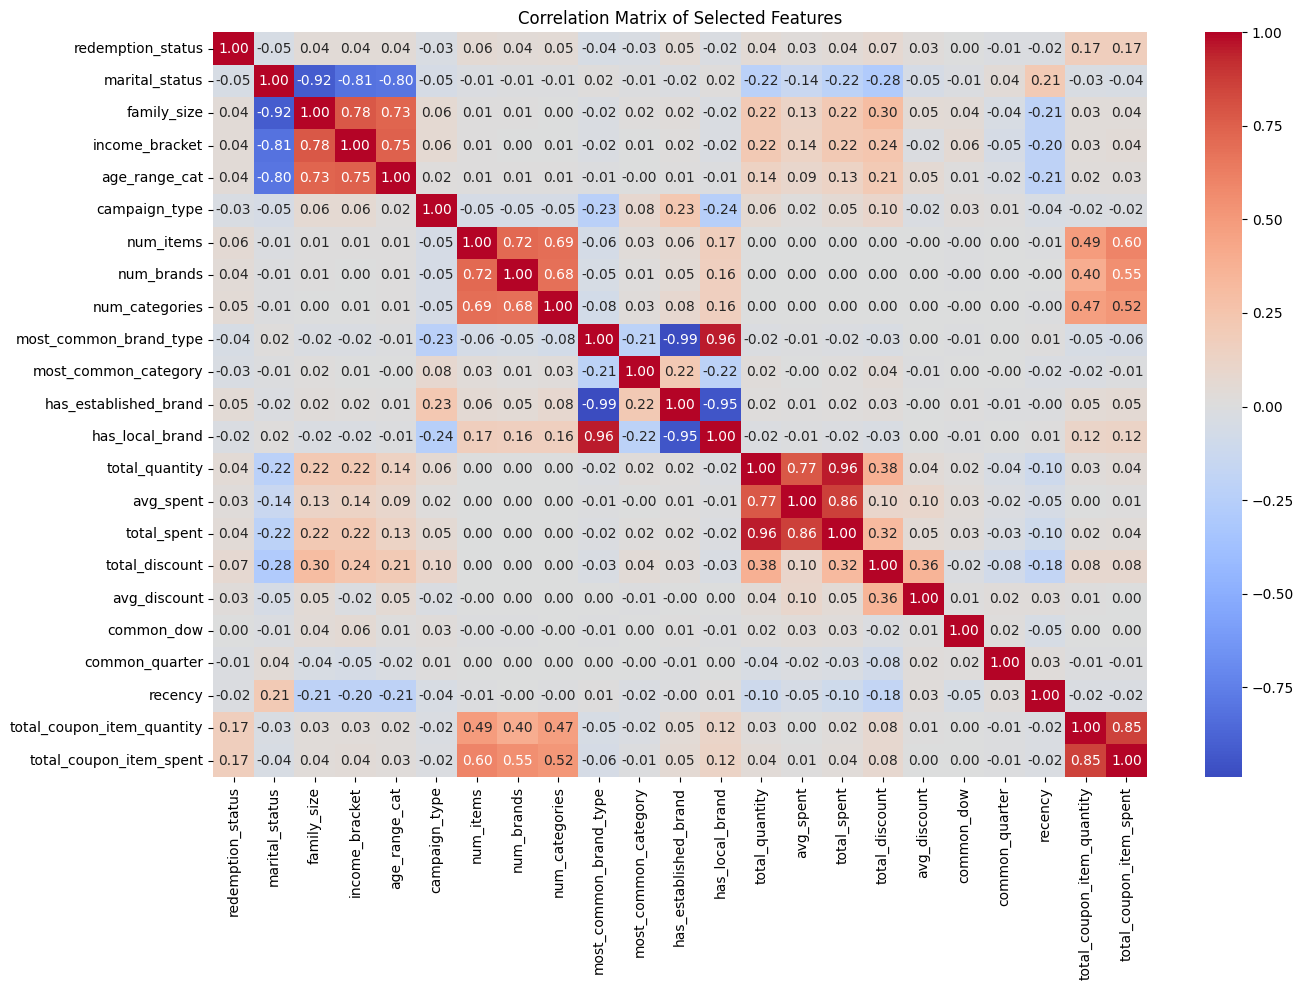

In [440]:
# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=selected_features, yticklabels=selected_features)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

We select those features to train the model which shows high correlation with the redemption_status feature, and avoid selecting too many features with high correlation among them to be safe from Multi-Collinearity.

Lets start building our First Model using Random Forest Classifier.

**Random Forest Classifier**

In [441]:
# Main Model RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Manually selecting Model Features
m_features = [
    'income_bracket', 'age_range_cat', 'total_quantity', 'campaign_type',
    'most_common_brand_type', 'most_common_category', 'num_items', 'num_brands',
    'num_categories', 'has_established_brand', 'total_spent', 'total_discount',
    'avg_discount', 'common_dow', 'common_month', 'common_quarter',
    'demographics_missing', 'campaign_duration', 'num_unique_transaction_days',
    'total_coupon_item_quantity', 'total_coupon_item_spent'
]

target = 'redemption_status'

# Split data
df1 = df.copy()

X1 = df1[m_features]
y1 = df1[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

# Make a copy of X1_train and X1_test
X1_train_encoded = X1_train.copy()
X1_test_encoded = X1_test.copy()

# Identify categorical columns
categorical_cols = X1_train_encoded.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    X1_train_encoded[col] = le.fit_transform(X1_train_encoded[col].astype(str))
    X1_test_encoded[col] = le.transform(X1_test_encoded[col].astype(str))

# Train model
rf_model1 = RandomForestClassifier(n_estimators=170, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model1.fit(X1_train_encoded, y1_train)

# Predict
y1_train_pred = rf_model1.predict(X1_train_encoded)
y1_test_pred = rf_model1.predict(X1_test_encoded)

# Predict probabilities instead of class labels
train_probs = rf_model1.predict_proba(X1_train_encoded)[:, 1]
test_probs = rf_model1.predict_proba(X1_test_encoded)[:, 1]

# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y1_train, train_probs)
test_roc_auc = roc_auc_score(y1_test, test_probs)

# Evaluate
print("Train Accuracy:", accuracy_score(y1_train, y1_train_pred))
print("Test Accuracy:", accuracy_score(y1_test, y1_test_pred))
print(f"Train AUC-ROC Score: {train_roc_auc:.4f}")
print(f"Test AUC-ROC Score: {test_roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y1_test, y1_test_pred))

Train Accuracy: 0.999984049764734
Test Accuracy: 0.9920888094934286
Train AUC-ROC Score: 1.0000
Test AUC-ROC Score: 0.9778

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00     15528
        True       0.75      0.23      0.35       146

    accuracy                           0.99     15674
   macro avg       0.87      0.61      0.67     15674
weighted avg       0.99      0.99      0.99     15674



Although the Train ROC Score and Test ROC score are quite high for this model, but recall is very low i.e. it fails to catch many true positives.
We will try to optimize it now.

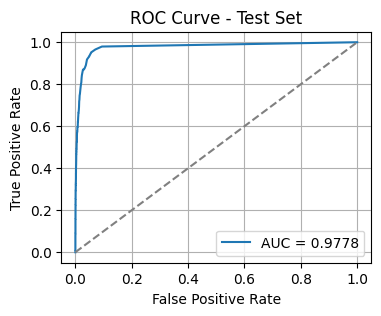

In [442]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y1_test, test_probs)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {test_roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend()
plt.grid()
plt.show()

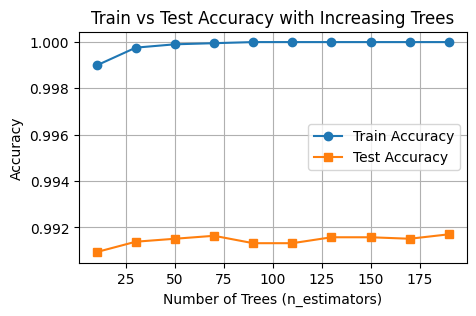

In [443]:
# Hyper-Parameter tuning for multiple values of n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators_range = range(10, 201, 20)  # Try models from 10 to 200 trees
train_scores = []
test_scores = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    model.fit(X1_train_encoded, y1_train)

    train_pred = model.predict(X1_train_encoded)
    test_pred = model.predict(X1_test_encoded)

    train_acc = accuracy_score(y1_train, train_pred)
    test_acc = accuracy_score(y1_test, test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(n_estimators_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy with Increasing Trees')
plt.legend()
plt.grid(True)
plt.show()

This Random Forest Model gives almost same accuracy at about 70 trees and 190 trees so we keep it as 70 finally to not increase the model's complexity Unnecessarily.

Now retraining the model with the 15 most important features and n_estimators as 70.

In [444]:
# Tuned RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 15 features according to feature importance plot
best_features = [
    'total_coupon_item_quantity', 'total_coupon_item_spent', 'num_items',
    'total_discount', 'total_quantity','avg_discount', 'total_spent',
    'income_bracket', 'num_unique_transaction_days', 'has_established_brand',
    'most_common_brand_type', 'campaign_type', 'most_common_category',
    'age_range_cat', 'common_month'
]

target = 'redemption_status'

# Split data
df_rf = df.copy()

X1 = df_rf[best_features]
y1 = df_rf[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

# Make a copy of X1_train and X1_test
X1_train_encoded = X1_train.copy()
X1_test_encoded = X1_test.copy()

# Identify categorical columns
categorical_cols = X1_train_encoded.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    X1_train_encoded[col] = le.fit_transform(X1_train_encoded[col].astype(str))
    X1_test_encoded[col] = le.transform(X1_test_encoded[col].astype(str))

# Train model
rf_model2 = RandomForestClassifier(n_estimators=70, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model2.fit(X1_train_encoded, y1_train)

# Predict
y1_train_pred = rf_model2.predict(X1_train_encoded)
y1_test_pred = rf_model2.predict(X1_test_encoded)

# Predict probabilities instead of class labels
train_probs = rf_model2.predict_proba(X1_train_encoded)[:, 1]
test_probs = rf_model2.predict_proba(X1_test_encoded)[:, 1]

# Calculate ROC AUC scores
train_roc_auc = roc_auc_score(y1_train, train_probs)
test_roc_auc = roc_auc_score(y1_test, test_probs)

# Evaluate
print("Train Accuracy:", accuracy_score(y1_train, y1_train_pred))
print("Test Accuracy:", accuracy_score(y1_test, y1_test_pred))
print("Train ROC:", train_roc_auc)
print("Test ROC:", test_roc_auc)
print("\nClassification Report:\n", classification_report(y1_test, y1_test_pred))

Train Accuracy: 0.9996650450594147
Test Accuracy: 0.9911318106418272
Train ROC: 0.9999146122801017
Test ROC: 0.9736262994643349

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00     15528
        True       0.58      0.17      0.26       146

    accuracy                           0.99     15674
   macro avg       0.79      0.59      0.63     15674
weighted avg       0.99      0.99      0.99     15674



Although this model has good ROC scores on both the test and train data, but has significantly low recall for True Values i.e. Redemption_status = 1. And as per the business requirement, it is important for us to accurately predict the True Values.

Even after Hyper Parameter tuning the Recall for True values doesn't seem to improve.

Also when the Public Test data of the Hackathon is feed into this Model, it yield a ROC of 0.85

So, let's try another model which will be Light BGM.



---



---



**Light BGM**

In [445]:
!pip install category_encoders

In [446]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from category_encoders import TargetEncoder
import lightgbm as lgb

# Make a copy of df
df2 = df.copy()

# Define columns
m_features = [
    'income_bracket', 'age_range_cat', 'total_quantity', 'campaign_type',
    'most_common_brand_type', 'most_common_category', 'num_items', 'num_brands',
    'num_categories', 'has_established_brand', 'total_spent', 'total_discount',
    'avg_discount', 'common_dow', 'common_month', 'common_quarter',
    'demographics_missing', 'campaign_duration', 'num_unique_transaction_days',
    'total_coupon_item_quantity', 'total_coupon_item_spent'
]

one_hot_cols = [
    'marital_status', 'campaign_type', 'most_common_brand_type',
    'common_dow', 'common_month', 'common_quarter', 'age_range_cat', 'rented'
]

target_encode_cols = ['most_common_category']

# Apply one-hot encoding
df2 = pd.get_dummies(df2, columns=one_hot_cols, drop_first=True)

# Apply target encoding
te = TargetEncoder(cols=target_encode_cols)
df2[target_encode_cols] = te.fit_transform(df2[target_encode_cols], df2['redemption_status'])

# Prepare data for training
X = df2[[col for col in df2.columns if col in m_features or col.startswith(tuple(one_hot_cols))]]
y = df2['redemption_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
# Train LightGBM model
model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=pos_weight)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009299 -> initscore=-4.668507
[LightGBM] [Info] Start training from score -4.668507
Accuracy: 0.9813704223554932

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99     15528
        True       0.29      0.66      0.40       146

    accuracy                           0.98     15674
   macro avg       0.64      0.82      0.69     15674
weighted avg       0.99      0.98      0.99     15674



The LightBGM Model has given a very good accuracy with a good Recall only with the initial training as compared to the tuned RandomForestClassifier Model.
Let's tune this model any try to improve the scores further.

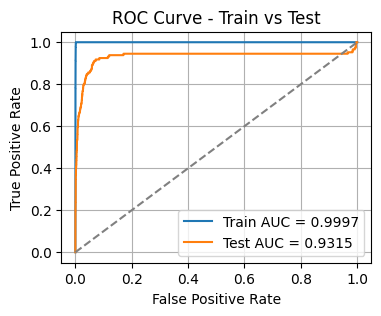

Train AUC-ROC: 0.9997
Test AUC-ROC: 0.9315


In [447]:
# ROC Curve Train vs Test
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_proba, dataset_name):
    auc_score = roc_auc_score(y_true, y_proba)
    fpr, tpr, _ = roc_curve(y_true, y_proba)

    plt.plot(fpr, tpr, label=f"{dataset_name} AUC = {auc_score:.4f}")

    return auc_score

plt.figure(figsize=(4, 3))

# Train set
y_train_proba = model.predict_proba(X_train)[:, 1]
train_auc = plot_roc_curve(y_train, y_train_proba, "Train")

# Test set
y_test_proba = model.predict_proba(X_test)[:, 1]
test_auc = plot_roc_curve(y_test, y_test_proba, "Test")

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Train vs Test")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Train AUC-ROC: {train_auc:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")

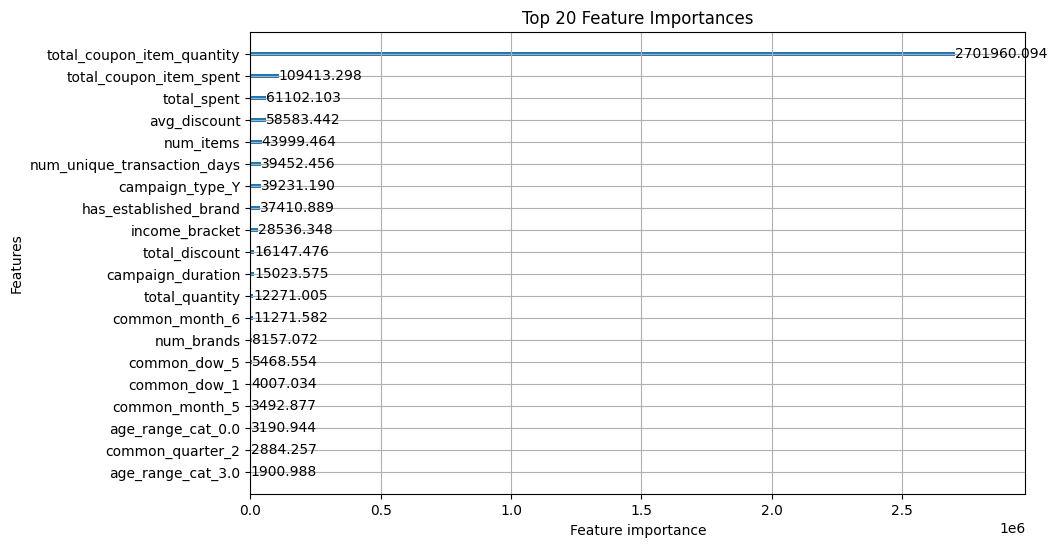

In [448]:
# Plot of top 20 features for the LightBGM Model
import matplotlib.pyplot as plt

lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10,6))
plt.title("Top 20 Feature Importances")
plt.show()

In [449]:
# Get feature importances from the trained model
importances = model.booster_.feature_importance(importance_type='gain')
feature_names = model.booster_.feature_name()

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sorting by importance to get top 20
top_20_features = feature_importance_df.sort_values(by='importance', ascending=False).head(20)

# Display
print(top_20_features)

                        feature    importance
13   total_coupon_item_quantity  2.701960e+06
14      total_coupon_item_spent  1.094133e+05
7                   total_spent  6.110210e+04
9                  avg_discount  5.858344e+04
1                     num_items  4.399946e+04
10  num_unique_transaction_days  3.945246e+04
17              campaign_type_Y  3.923119e+04
5         has_established_brand  3.741089e+04
0                income_bracket  2.853635e+04
8                total_discount  1.614748e+04
12            campaign_duration  1.502357e+04
6                total_quantity  1.227101e+04
29               common_month_6  1.127158e+04
2                    num_brands  8.157072e+03
23                 common_dow_5  5.468554e+03
19                 common_dow_1  4.007034e+03
28               common_month_5  3.492877e+03
39            age_range_cat_0.0  3.190944e+03
36             common_quarter_2  2.884257e+03
42            age_range_cat_3.0  1.900988e+03


In [450]:
from sklearn.metrics import classification_report, roc_auc_score
import lightgbm as lgb

# Columns to drop due to less feature importance
drop_cols = [
    'common_month_3',
    'common_month_4',
    'common_dow_6',
    'age_range_cat_2.0',
    'common_month_6',
    'most_common_brand_type_Local'
]

# Drop from train and test
X_train_dropped = X_train.drop(columns=drop_cols, errors='ignore')
X_test_dropped = X_test.drop(columns=drop_cols, errors='ignore')

# Train a new LightGBM model
model_pruned = lgb.LGBMClassifier(
    learning_rate=0.01,
    n_estimators=2000,
    num_leaves=31,
    max_depth=7,
    min_child_samples=30,
    scale_pos_weight=pos_weight,
    reg_alpha=0.2,
    reg_lambda=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_pruned.fit(X_train_dropped, y_train)

# Predict and evaluate
y_train_proba = model_pruned.predict_proba(X_train_dropped)[:, 1]
y_test_proba = model_pruned.predict_proba(X_test_dropped)[:, 1]

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Train AUC-ROC: {train_auc:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")

# Classification report with 0.5 threshold
y_pred_test = (y_test_proba >= 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009299 -> initscore=-4.668507
[LightGBM] [Info] Start training from score -4.668507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [455]:
# Calculate class weights manually
from sklearn.utils import class_weight
import numpy as np

weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_train),
                                             y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}
print(class_weights_dict)

# Apply to LightGBM
model_weighted = lgb.LGBMClassifier(random_state=42, class_weight=class_weights_dict)
model_weighted.fit(X_train_dropped, y_train)

# After training:
final_feature_list = X_train_dropped.columns.tolist()

{0: np.float64(0.5046931349819681), 1: np.float64(53.769296740994854)}
[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [456]:
# AUC ROC Score and Classification report for model_weighted
from sklearn.metrics import classification_report, roc_auc_score

y_probs_weighted = model_weighted.predict_proba(X_test_dropped)[:, 1]
y_pred_weighted = (y_probs_weighted >= 0.5).astype(int)

print("AUC-ROC:", roc_auc_score(y_test, y_probs_weighted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

AUC-ROC: 0.9884115658501126

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99     15528
        True       0.29      0.82      0.43       146

    accuracy                           0.98     15674
   macro avg       0.64      0.90      0.71     15674
weighted avg       0.99      0.98      0.98     15674



`model_weighted` seems to be a very balanced model with a very good AUC ROC Score and also maintaining a good Precision Recall Tradeoff



---



---



In [458]:
# Randomized Search CV
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# Assuming class_weights_dict is defined like:
class_weights_dict = {0:1, 1:20}

# Define the model with class weights
model_rsc = LGBMClassifier(
    class_weight=class_weights_dict,
    random_state=42,
    n_jobs=-1
)

# Define parameter distributions for Randomized Search
param_dist = {
    'num_leaves': [31, 40, 50, 60],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, -1],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Use built-in roc_auc scorer
scoring = 'roc_auc'

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_rsc,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    scoring=scoring,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# Fit to training data
random_search.fit(X_train_dropped, y_train)

# Best params and score
print("Best parameters found:", random_search.best_params_)
print("Best AUC-ROC score:", random_search.best_score_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158055 -> initscore=-1.672775
[LightGBM] [Info] Start training from score -1.672775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 40, 'n_estimators': 100, 'min_child_samples': 30, 'max_depth': 10

In [459]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Retrain with best params from Randomized Search CV
best_params = {
    'subsample': 0.8,
    'reg_lambda': 0.5,
    'reg_alpha': 0.5,
    'num_leaves': 40,
    'n_estimators': 100,
    'min_child_samples': 30,
    'max_depth': 10,
    'learning_rate': 0.1,
    'colsample_bytree': 0.6,
    'class_weight': class_weights_dict,
    'random_state': 42,
    'n_jobs': -1
}

model_final = LGBMClassifier(**best_params)
model_final.fit(X_train_dropped, y_train)

# Predictions
y_train_pred = model_final.predict(X_train_dropped)
y_test_proba = model_final.predict_proba(X_test_dropped)[:, 1]

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# ROC for test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
j_scores = tpr - fpr
best_thresh = thresholds[j_scores.argmax()]
print(f"Best threshold: {best_thresh:.4f}")

# Thresholded prediction on test
y_test_pred = (y_test_proba >= best_thresh).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Best Threshold): {test_accuracy:.4f}")

# Classification report
print("Classification Report (Best Threshold):")
print(classification_report(y_test, y_test_pred))

# ROC-AUC
train_auc = roc_auc_score(y_train, model_final.predict_proba(X_train_dropped)[:, 1])
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")

[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158055 -> initscore=-1.672775
[LightGBM] [Info] Start training from score -1.672775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Train Accuracy: 0.9919
Best threshold: 0.0339
Test Accuracy (Best Threshold): 0.9453
Classification Report (Best Threshold):
              precision    recall  f1-score   support

       False       1.00      0.94      

`model_final` which is my model after applying the parameters learnt from RandomizedSearchCV performs very well with the ROC Scores and also has very high recall
But in order to increase the Recall it compromises on the Precision

**Conclusion:**

Even though `model_final`(Parameter Tuned Model after RandomizedSearchCV)   has slightly higher ROC-AUC, `model_weighted`(LightBGM Model after applying manually calculated Class Weights) gives a better balance of real-world performance metrics while almost matching ROC-AUC.

`model_weighted` maintains a better Precision-Recall Tradeoff which makes it a better model to deploy this for business use, where precision matters (e.g. costly targeted campaigns)

`model_weighted` also helps us to avoid false positives (customers predicted to redeem but actually won’t). Therefore improving the quality of positive predictions.

# Model Performance

Now i will predict the probability for our test data to be uploaded for Hackathon using `model_weighted`, as i have chosen this model as my final model

In [460]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pred_df = test_df.copy()

m_features = [
    'income_bracket', 'age_range_cat', 'total_quantity', 'campaign_type',
    'most_common_brand_type', 'most_common_category', 'num_items', 'num_brands',
    'num_categories', 'has_established_brand', 'total_spent', 'total_discount',
    'avg_discount', 'common_dow', 'common_month', 'common_quarter',
    'demographics_missing', 'campaign_duration', 'num_unique_transaction_days',
    'total_coupon_item_quantity', 'total_coupon_item_spent'
]

# Apply one-hot encoding
pred_df = pd.get_dummies(pred_df, columns=one_hot_cols, drop_first=True)

# Apply target encoding
# 1. Copy full dataframe
pred_df_encoded = pred_df.copy()

# 2. Apply target encoding and replace only those columns
pred_df_encoded[target_encode_cols] = te.transform(pred_df[target_encode_cols])

# Prepare data for prediction
X_pred = pred_df_encoded[final_feature_list]

submission = pd.DataFrame()
submission["id"] = test_df["id"]

submission["redemption_status"] = model_weighted.predict_proba(X_pred)[:, 1]
submission['redemption_status'].value_counts()

,count
redemption_status,
0.000040,161
0.000035,160
0.000039,157
0.000064,114
0.000067,90
...,...
0.216907,1
0.117577,1
0.005840,1


In [462]:
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
